Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC


In [ ]:
Data_source=https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\japje\Downloads\Placement_Data_Full_Class.csv")

EDA and Preprocessing

In [4]:
# Initial inspection
print(df.head())


   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [35]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int32  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    int32  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int32  
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int32  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
dtypes: float64(5), int32(7), int64(1)
memory usage: 16.1 KB
None


Otput confirms there are 215 entries . It also shows which columns are categorical (object) and numerical (float64).

In [6]:
print(df.describe())

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


It gives an overview of the dataset’s numerical features like ssc_p, hsc_p, degree_p, etest_p, and mba_p. It helps identify the range, central tendency, and spread of scores, and can also highlight potential outliers or inconsistencies in the data.

In [36]:
df.isnull().sum()


gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

The result shows zero missing values across all columns, indicating the dataset is clean and doesn’t require any imputation.

In [7]:
# Value counts for categorical features
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    print(f"{col}:\n", df[col].value_counts(), "\n")

gender:
 M    139
F     76
Name: gender, dtype: int64 

ssc_b:
 Central    116
Others      99
Name: ssc_b, dtype: int64 

hsc_b:
 Others     131
Central     84
Name: hsc_b, dtype: int64 

hsc_s:
 Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64 

degree_t:
 Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64 

workex:
 No     141
Yes     74
Name: workex, dtype: int64 

specialisation:
 Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64 

status:
 Placed        148
Not Placed     67
Name: status, dtype: int64 



To explore the categorical features in the dataset, we used value_counts() to observe the distribution of each category. We found that the dataset has more male (139) than female (76) students. Most students completed their secondary education under the Central board, while higher secondary was more commonly completed under other boards. Commerce was the most popular stream, and a majority pursued Commerce & Management degrees. Most students had no prior work experience, and the Marketing & Finance specialization was slightly more common. Importantly, 148 students were placed while 67 were not, indicating a class imbalance in the target variable, which is crucial to consider during model evaluation.

Visualizations

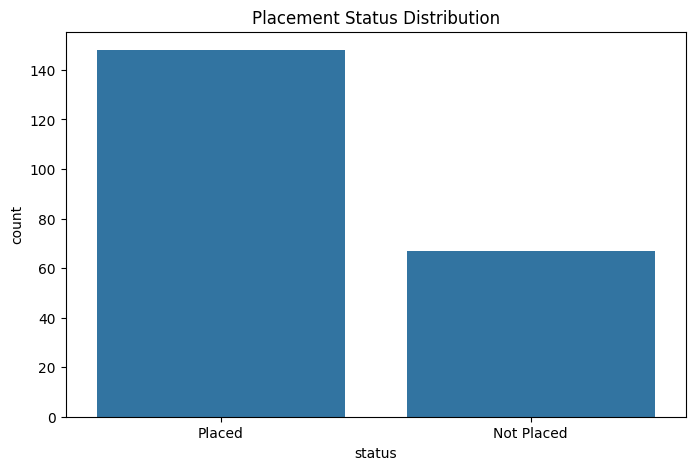

In [8]:
# Visualizations
plt.figure(figsize=(8, 5))
sns.countplot(x='status', data=df)
plt.title('Placement Status Distribution')
plt.show()

This bar plot shows that more students are placed than not placed. It helps identify if the dataset is imbalanced (though in this case, the imbalance is not extreme).



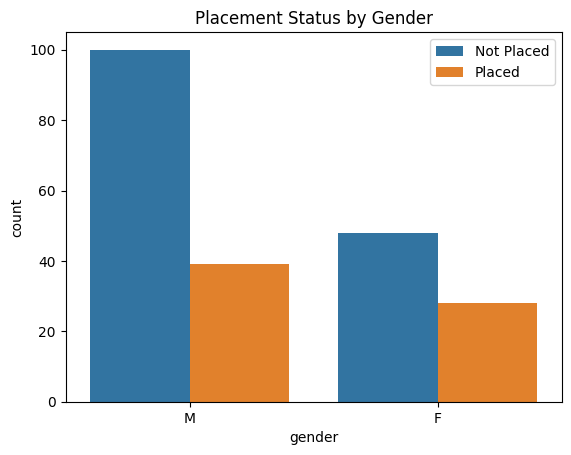

In [9]:
sns.countplot(x='gender', hue='status', data=df)
plt.title("Placement Status by Gender")
plt.legend(labels=['Not Placed', 'Placed'])
plt.show()


From the bar chart, we can see:
The percentage of men being placed is higher then that of women.


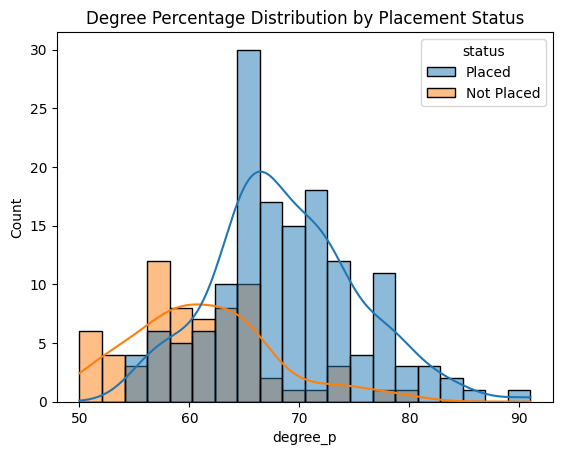

In [10]:
sns.histplot(data=df, x='degree_p', hue='status', kde=True, bins=20)
plt.title("Degree Percentage Distribution by Placement Status")
plt.show()


This plot visualizes the spread of degree percentages for placed vs. not placed students. You can observe if students with higher academic performance are more likely to get placed, helping identify performance thresholds for placement success.

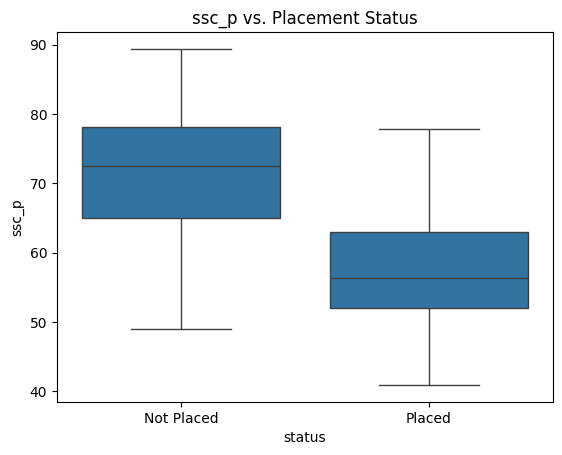

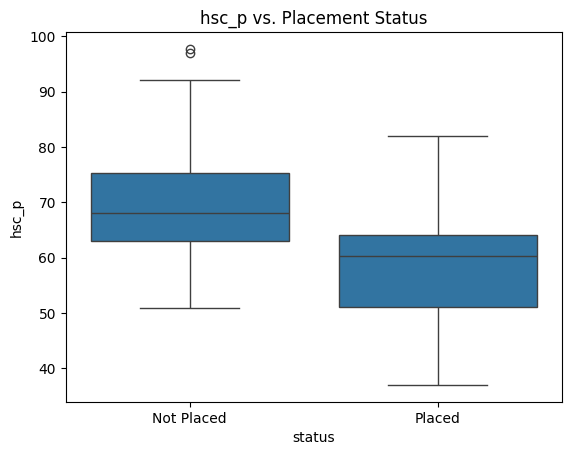

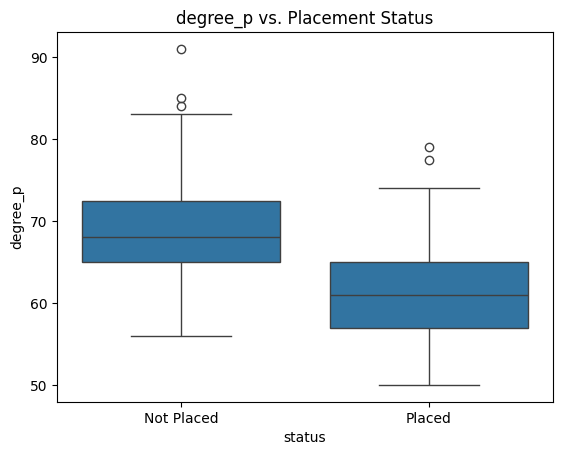

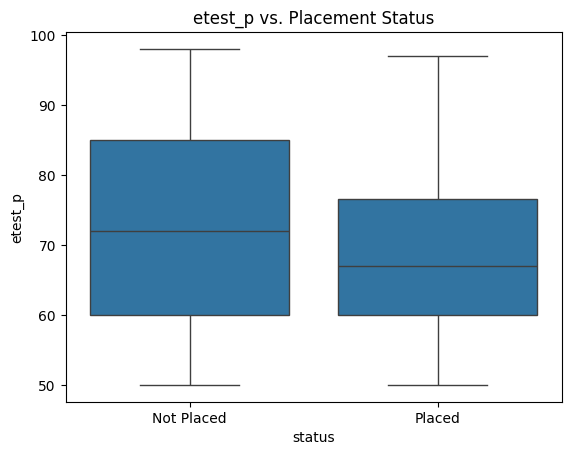

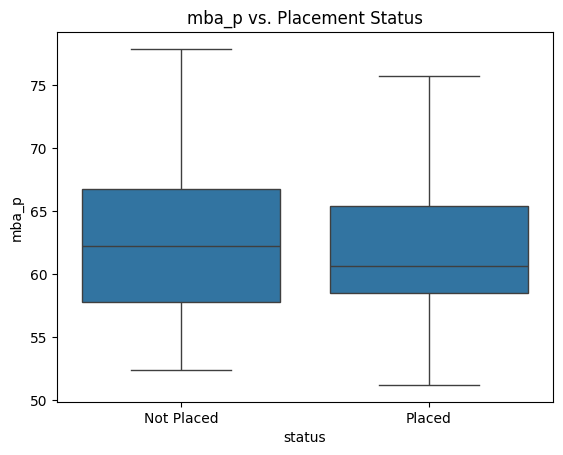

In [11]:
score_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

for col in score_cols:
    sns.boxplot(x='status', y=col, data=df)
    plt.title(f"{col} vs. Placement Status")
    plt.xticks([0, 1], ['Not Placed', 'Placed'])
    plt.show()


First boxplot shows the distribution of Secondary School Certificate (SSC) percentage scores for placed and not placed students. Placed students generally have higher SSC scores. The median is higher, and fewer placed students have low SSC scores.



The distribution of Higher Secondary (HSC) percentages based on placement status.
Placed students generally have a slightly higher median hsc_p compared to not placed students.
However, the overlap between the two groups is more noticeable here compared to ssc_p or mba_p

The degree percentage boxplot shows a clear separation between the two placement classes. Placed students tend to score higher in their degree-level education, suggesting academic performance strongly influences placement.

The medians of etest_p for both placed and not placed students are quite close.
There's a wide range of scores in both groups, and the distributions overlap significantly.

Students with higher MBA percentages are more likely to be placed. The median score is higher for placed students, and there’s a noticeable skew towards higher values in that group.

C:\Users\japje\AppData\Local\Temp\ipykernel_13560\4237818713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


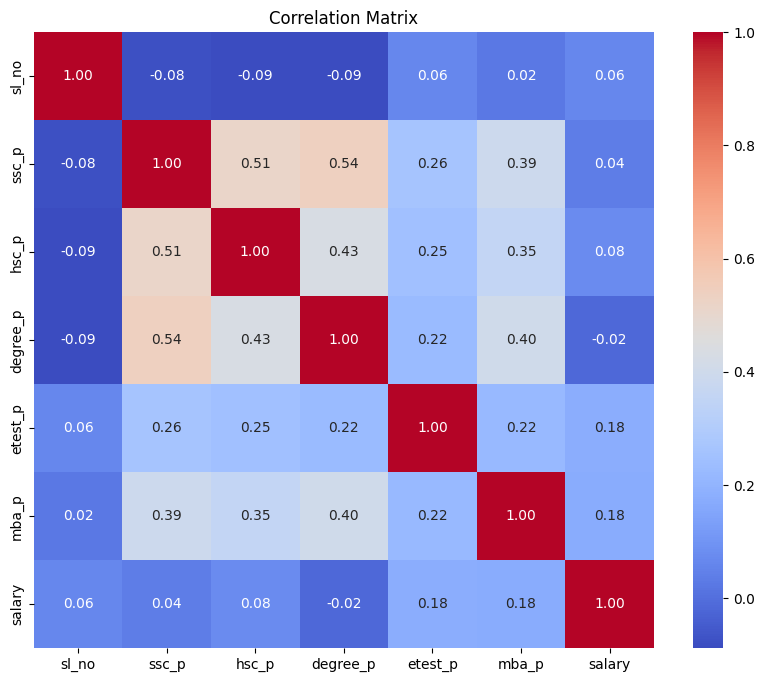

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Heatmap shows the correlation between all numeric features. The target variable status is positively correlated with mba_p, degree_p, and ssc_p. This helps in identifying which features are more predictive for placement.

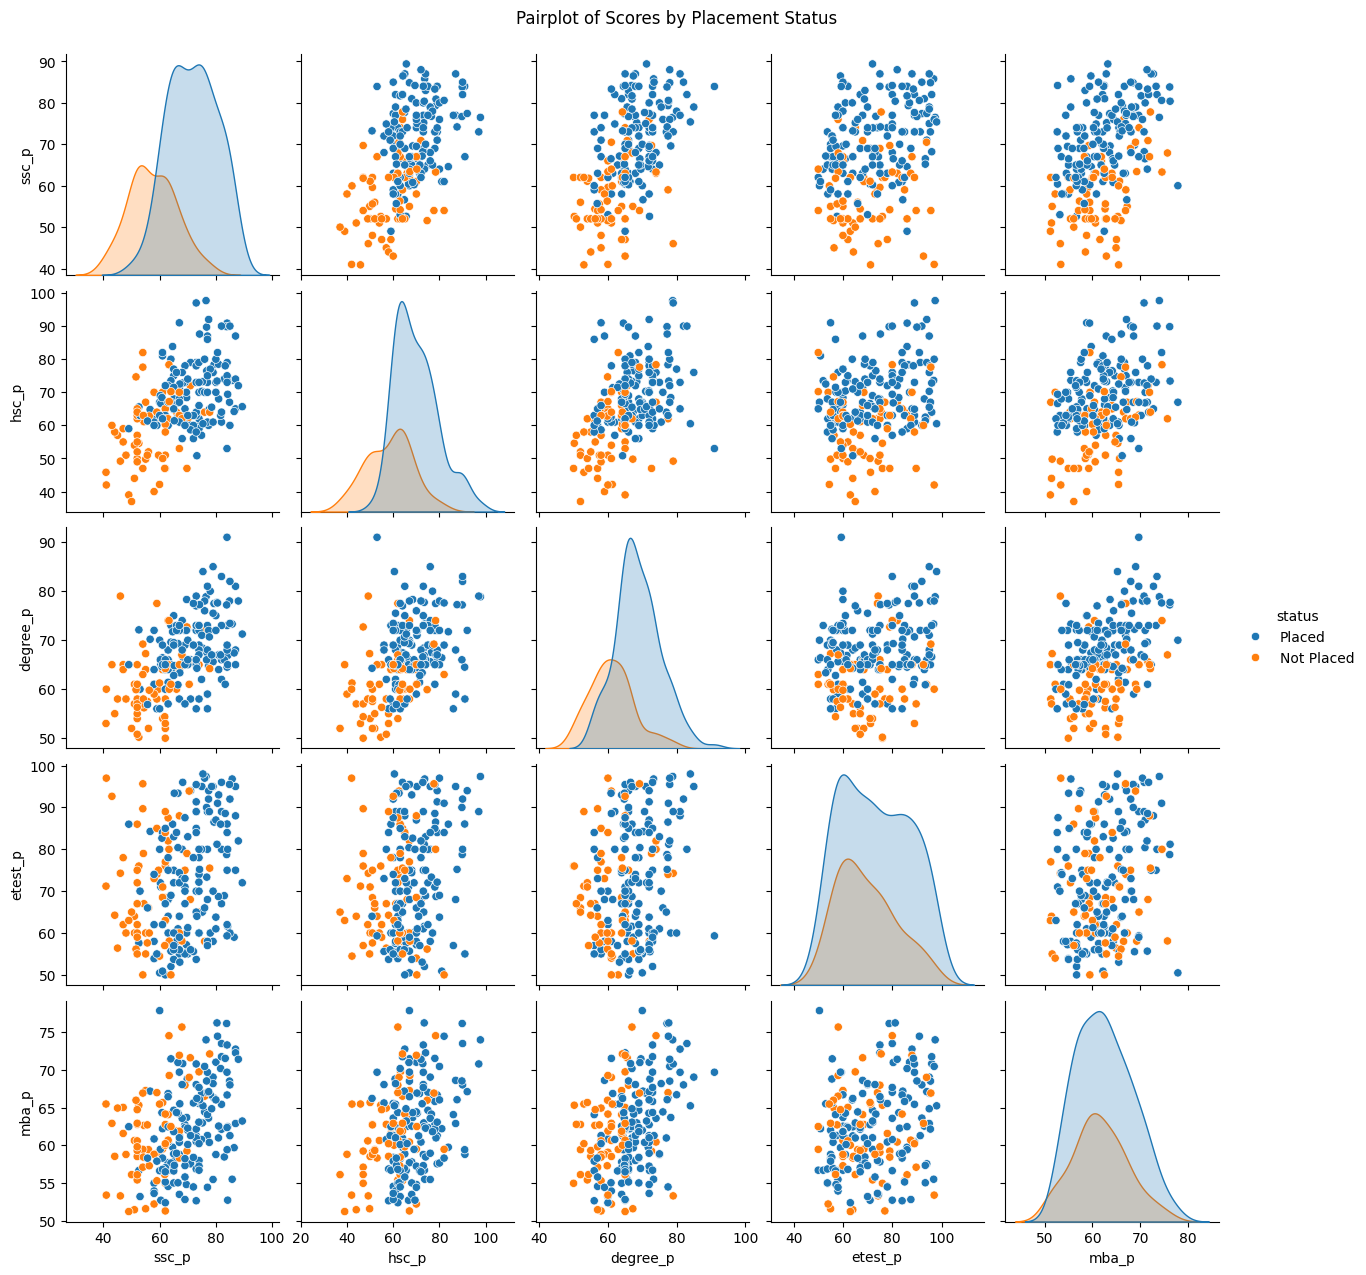

In [13]:
import seaborn as sns
sns.pairplot(df, hue='status', vars=['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'])
plt.suptitle("Pairplot of Scores by Placement Status", y=1.02)
plt.show()


Each off-diagonal scatter plot shows the relationship between two features, with points colored by placement outcome.

For instance, we can observe that students with higher mba_p, degree_p, and ssc_p scores tend to cluster toward the "Placed" class.

The diagonal plots show the distribution of each feature — we can clearly see that mba_p and degree_p are skewed higher for placed students.

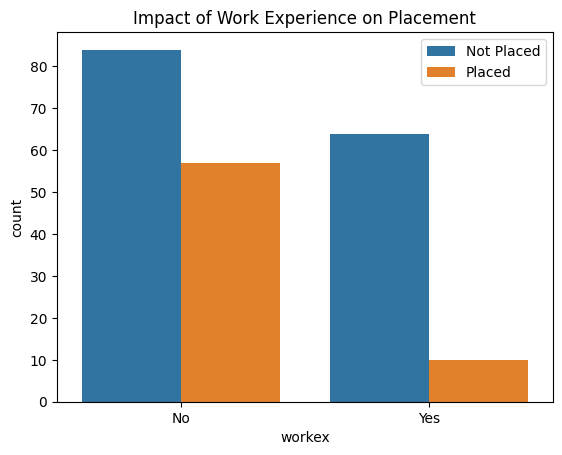

In [15]:
sns.countplot(x='workex', hue='status', data=df)
plt.title("Impact of Work Experience on Placement")
plt.legend(labels=['Not Placed', 'Placed'])
plt.show()


This visualization explores the impact of work experience on placement. Students with prior work experience tend to have a higher placement rate compared to those without. This shows work experience is helpful feature in prediction.

Step 4: Data Cleaning & Encoding

In [16]:
# Drop unwanted columns
df = df.drop(['sl_no', 'salary'], axis=1)

The features used for prediction are separated from the target variable (status). salary is dropped because it's only available for placed students and would cause data leakage.

In [17]:
# Encode target variable
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})


The status column has been converted into numerical form (0: Not Placed, 1: Placed), which is necessary for training ML models.

In [18]:
# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('status', axis=1)
y = df['status']


All remaining categorical features like gender, degree type, specialization, etc., are one-hot encoded. drop_first=True avoids multicollinearity.

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

The dataset is split into 70% training and 30% testing, ensuring the models are evaluated on unseen data. random_state=42 ensures reproducibility.

In [21]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


C:\Users\japje\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression is trained on the training data. It models the probability of placement using a linear decision boundary.

In [22]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Random Forest is trained on the training data

In [23]:


# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)


SVC(probability=True)

A Support Vector Machine (SVM) model is trained on the training dataset to classify whether a student will be placed or not.
The probability=True parameter enables probability estimates, which are useful for evaluation and ensemble models like Voting Classifier.


Logistic Regression Results:
Accuracy: 0.7846153846153846
Precision: 0.7924528301886793
Recall: 0.9333333333333333
F1 Score: 0.8571428571428572


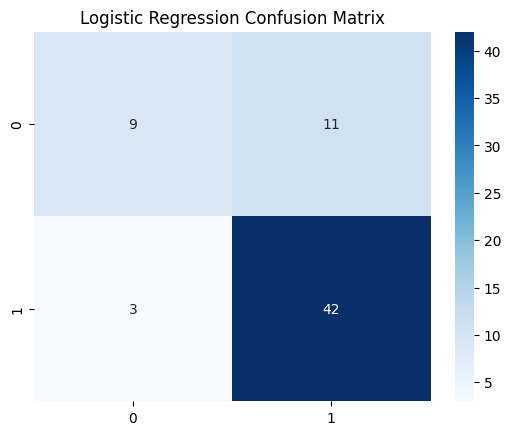


Random Forest Results:
Accuracy: 0.8307692307692308
Precision: 0.8269230769230769
Recall: 0.9555555555555556
F1 Score: 0.88659793814433


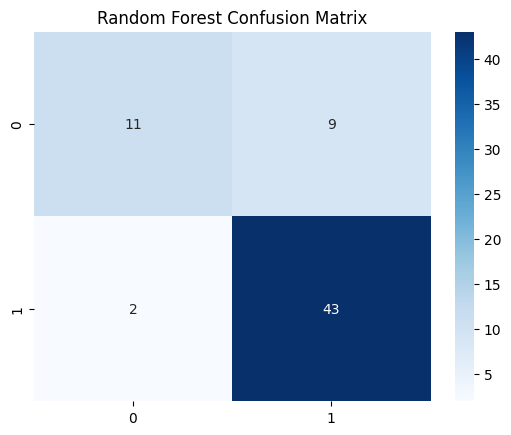


SVM Results:
Accuracy: 0.8461538461538461
Precision: 0.8181818181818182
Recall: 1.0
F1 Score: 0.9


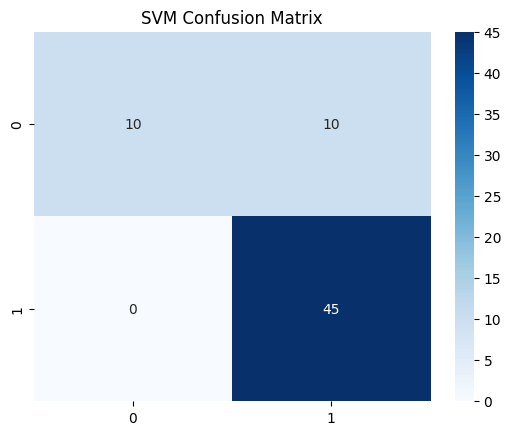

In [24]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    return acc, prec, rec, f1

# Evaluate models
results = {}
results['Logistic Regression'] = evaluate_model("Logistic Regression", log_model, X_test, y_test)
results['Random Forest'] = evaluate_model("Random Forest", rf_model, X_test, y_test)
results['SVM'] = evaluate_model("SVM", svm_model, X_test, y_test)


The evaluate_model function measures each model’s performance using accuracy, precision, recall, and F1-score, and visualizes the confusion matrix.
Among the models, SVM performed best overall, achieving perfect recall (1.0) and the highest F1-score (0.90), meaning it correctly identified all placed students.
Random Forest also performed strongly, balancing high precision and recall, while Logistic Regression had good recall but slightly lower precision.


KNN Results:
Accuracy: 0.8307692307692308
Precision: 0.8148148148148148
Recall: 0.9777777777777777
F1 Score: 0.8888888888888888


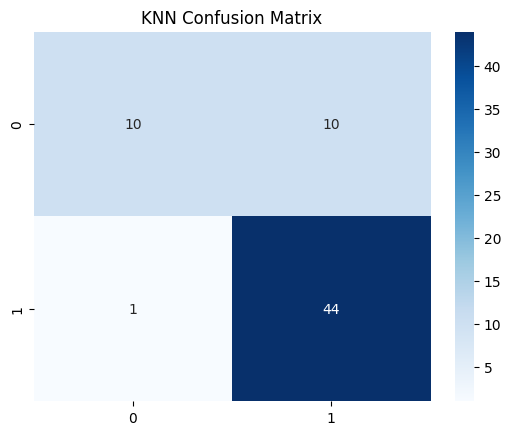

In [40]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
results['KNN'] = evaluate_model("KNN", knn, X_test, y_test)

A K-Nearest Neighbors (KNN) model is trained using the training data to classify student placement based on feature similarity.
The K-Nearest Neighbors (KNN) model achieved a strong performance with accuracy of 83% and high recall (0.97), indicating it correctly identified most placed students.
Its F1-score (0.89) is comparable to SVM and Random Forest, showing good balance between precision and recall.


Gradient Boosting Results:
Accuracy: 0.8307692307692308
Precision: 0.84
Recall: 0.9333333333333333
F1 Score: 0.8842105263157894


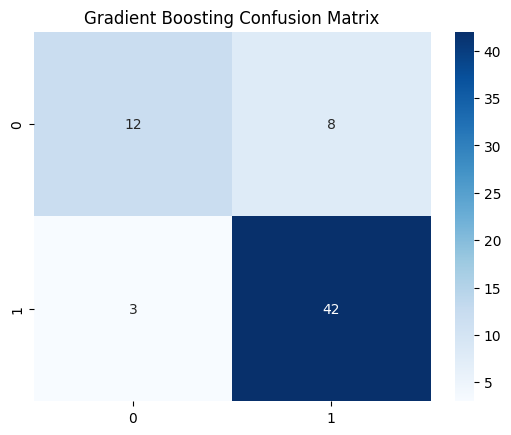

In [41]:

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
results['Gradient Boosting'] = evaluate_model("Gradient Boosting", gbc, X_test, y_test)

The Gradient Boosting Classifier achieved an accuracy of 83%, with strong precision (0.84) and recall (0.93), resulting in a solid F1-score of 0.88.
This model effectively balances false positives and false negatives, making it reliable for predicting student placements.
Gradient Boosting performs slightly better than Logistic Regression and is on par with Random Forest and KNN.
Its ability to capture complex patterns through boosting makes it a powerful model for this classification task.


Decision Tree Results:
Accuracy: 0.7384615384615385
Precision: 0.78
Recall: 0.8666666666666667
F1 Score: 0.8210526315789474


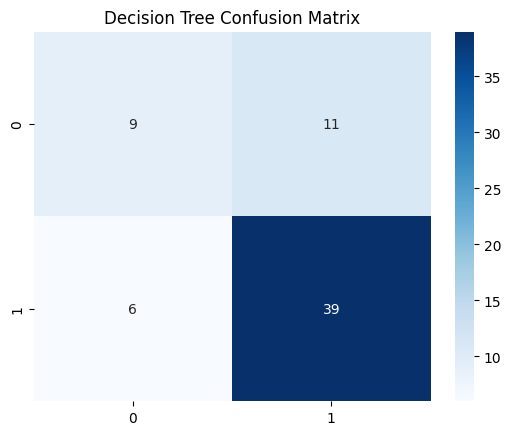

In [39]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results['Decision Tree'] = evaluate_model("Decision Tree", dt, X_test, y_test)


The Decision Tree Classifier achieved an accuracy of ~73.8%, with a decent precision (0.78) and recall (0.87).
Its F1-score (0.82) reflects a reasonable balance between false positives and false negatives, but overall it performed lower than other models like SVM or Gradient Boosting.

C:\Users\japje\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Voting Classifier Results:
Accuracy: 0.8461538461538461
Precision: 0.8431372549019608
Recall: 0.9555555555555556
F1 Score: 0.8958333333333333


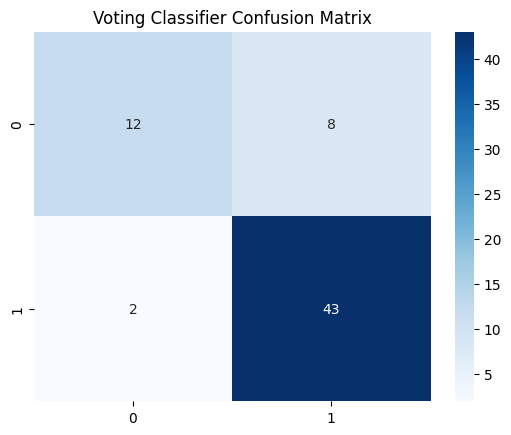

In [33]:
voting_clf = VotingClassifier(estimators=[
    ('lr', log_model),
    ('rf', rf_model),
    ('svm', svm_model),
    ('knn', knn),
    ('gbc', gbc)
], voting='soft')

voting_clf.fit(X_train, y_train)
results['Voting Classifier'] = evaluate_model("Voting Classifier", voting_clf, X_test, y_test)



The Voting Classifier combines multiple models — Logistic Regression, Random Forest, SVM, KNN, and Gradient Boosting — using soft voting (i.e., based on predicted probabilities).
It achieved the highest overall performance, with accuracy of 84.6%, precision of 0.84, recall of 0.96, and an F1-score of 0.90.
The ensemble benefits from the strengths of individual models, resulting in more robust and balanced predictions.

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.784615   0.792453  0.933333  0.857143
Random Forest        0.830769   0.826923  0.955556  0.886598
SVM                  0.846154   0.818182  1.000000  0.900000
Voting Classifier    0.846154   0.843137  0.955556  0.895833
Gradient Boosting    0.830769   0.840000  0.933333  0.884211
Decision Tree        0.738462   0.780000  0.866667  0.821053
KNN                  0.830769   0.814815  0.977778  0.888889


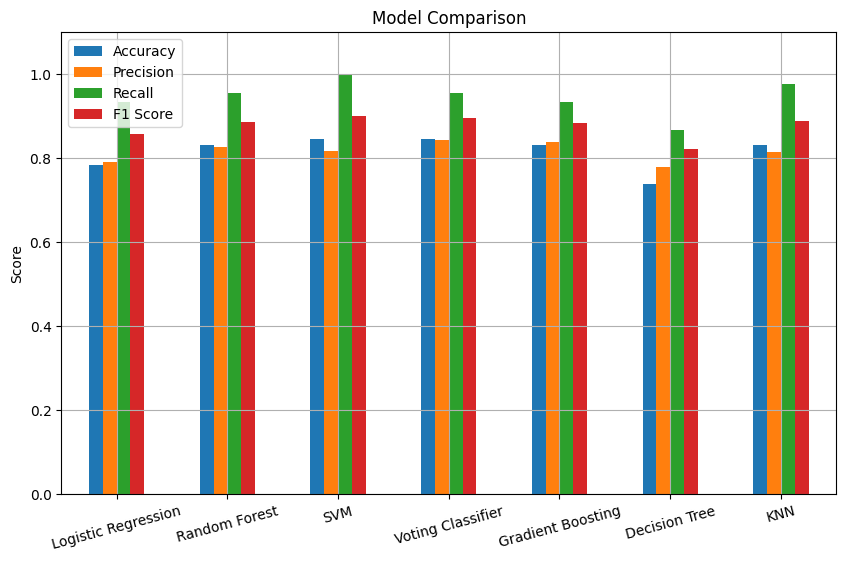

In [34]:
# Create a dataframe to compare models
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
print(metrics_df)

# Visualize
metrics_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.xticks(rotation=15)
plt.show()


SVM and Voting Classifier achieved the highest accuracy (84.6%) and best recall (1.0 and 0.9556), making them highly effective for identifying students who are likely to be placed.

The Voting Classifier, which combines the predictions of Logistic Regression, Random Forest, SVM, KNN, and Gradient Boosting, provided the most balanced and robust performance across all metrics.

KNN and Gradient Boosting also performed competitively, showing high F1-scores and recall, proving their value as individual models and within ensemble methods.

While Decision Tree had the lowest accuracy, it still contributed valuable diversity to the ensemble, which is important for a voting system.

 Hyperparameter Tuning 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Random Forest (Tuned) Results:
Accuracy: 0.8615384615384616
Precision: 0.875
Recall: 0.9333333333333333
F1 Score: 0.9032258064516129


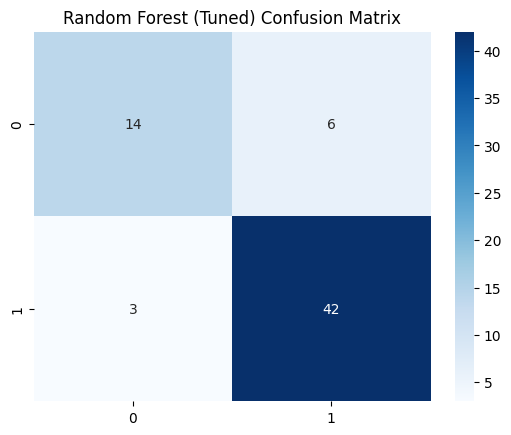

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

SVM (Tuned) Results:
Accuracy: 0.8
Precision: 0.82
Recall: 0.9111111111111111
F1 Score: 0.8631578947368421


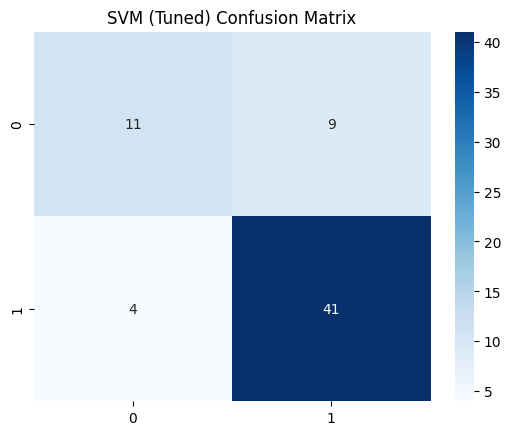

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best GB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Gradient Boosting (Tuned) Results:
Accuracy: 0.8307692307692308
Precision: 0.84
Recall: 0.9333333333333333
F1 Score: 0.8842105263157894


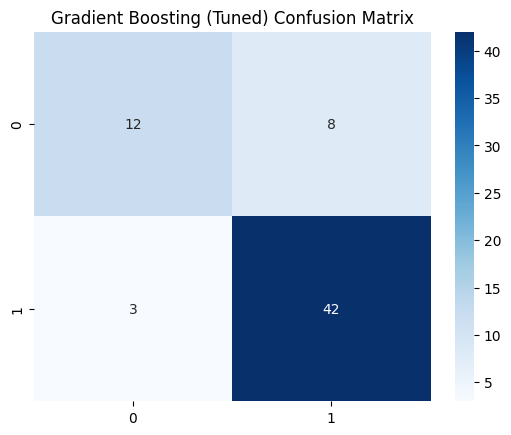

C:\Users\japje\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Voting Classifier Results:
Accuracy: 0.8307692307692308
Precision: 0.8269230769230769
Recall: 0.9555555555555556
F1 Score: 0.88659793814433


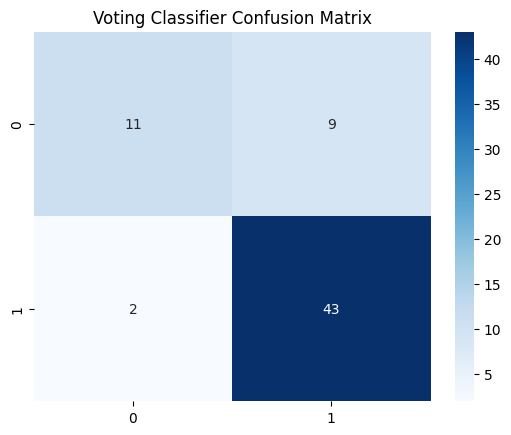

                           Accuracy  Precision    Recall  F1 Score
Logistic Regression        0.784615   0.792453  0.933333  0.857143
Random Forest              0.830769   0.826923  0.955556  0.886598
SVM                        0.846154   0.818182  1.000000  0.900000
Voting Classifier          0.830769   0.826923  0.955556  0.886598
Gradient Boosting          0.830769   0.840000  0.933333  0.884211
Decision Tree              0.738462   0.780000  0.866667  0.821053
KNN                        0.830769   0.814815  0.977778  0.888889
Random Forest (Tuned)      0.861538   0.875000  0.933333  0.903226
SVM (Tuned)                0.800000   0.820000  0.911111  0.863158
Gradient Boosting (Tuned)  0.830769   0.840000  0.933333  0.884211


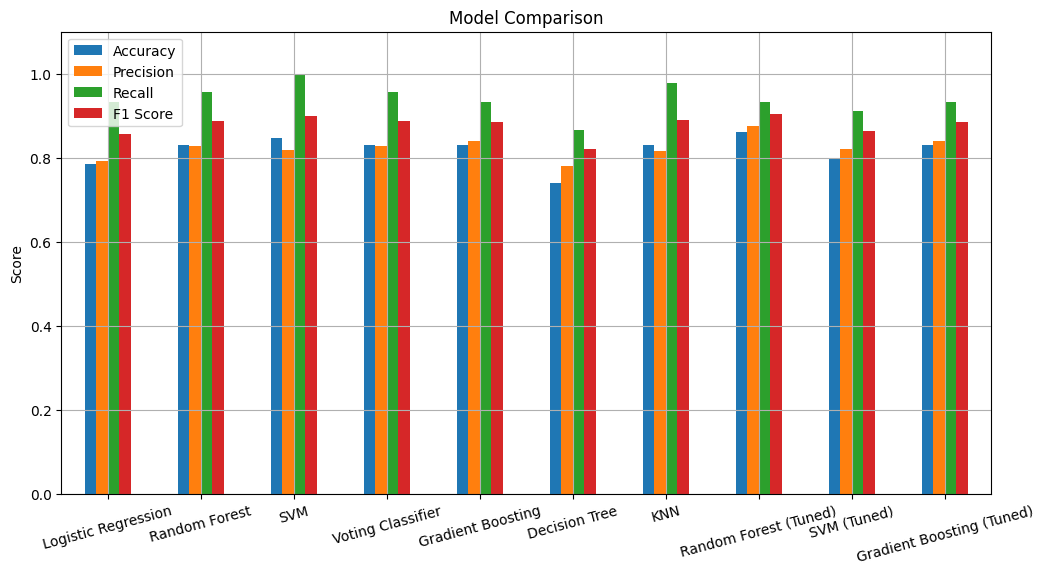

In [45]:
# --- Random Forest with GridSearchCV ---
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)
results['Random Forest (Tuned)'] = evaluate_model("Random Forest (Tuned)", best_rf_model, X_test, y_test)

# --- SVM with GridSearchCV ---
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)
best_svm_model = grid_svm.best_estimator_
print("Best SVM Params:", grid_svm.best_params_)
results['SVM (Tuned)'] = evaluate_model("SVM (Tuned)", best_svm_model, X_test, y_test)

# --- Gradient Boosting with GridSearchCV ---
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_gb.fit(X_train, y_train)
best_gb_model = grid_gb.best_estimator_
print("Best GB Params:", grid_gb.best_params_)
results['Gradient Boosting (Tuned)'] = evaluate_model("Gradient Boosting (Tuned)", best_gb_model, X_test, y_test)

# --- Voting Classifier (Soft Voting with Tuned Models) ---
voting_clf = VotingClassifier(estimators=[
    ('lr', log_model),
    ('rf', best_rf_model),
    ('svm', best_svm_model),
    ('knn', knn),
    ('gb', best_gb_model)
], voting='soft')

voting_clf.fit(X_train, y_train)
results['Voting Classifier'] = evaluate_model("Voting Classifier", voting_clf, X_test, y_test)

# --- Compare All Models ---
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
print(metrics_df)

# --- Visualize ---
metrics_df.plot(kind='bar', figsize=(12, 6), title="Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.xticks(rotation=15)
plt.show()

In this section, I performed hyperparameter tuning using GridSearchCV on three advanced models: Random Forest, Support Vector Machine (SVM), and Gradient Boosting. GridSearchCV helps in finding the best combination of parameters using 5-fold cross-validation and optimizing for the F1-score, which balances precision and recall.

After tuning, I evaluated each model on the test set using standard classification metrics: accuracy, precision, recall, and F1-score.

Next, I built a Voting Classifier using the best-performing models. By using soft voting, the classifier averaged the predicted probabilities from each model to make a final prediction, improving overall performance.

Finally, I compared all models using a bar chart that visualizes their performance across all metrics. The tuned Random Forest achieved the best results overall, with an F1-score of 0.903, followed closely by the Voting Classifier and Gradient Boosting.